<a href="https://colab.research.google.com/github/majedSD/Assignment_Flutter/blob/master/2019331563.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install kaggle

In [4]:
!pip install opencv-python-headless

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [6]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


In [7]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


In [8]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
! mkdir /content/kaggle_data

In [10]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


In [11]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [01:29<00:00, 32.3MB/s]
100% 2.40G/2.40G [01:29<00:00, 28.8MB/s]


In [12]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

In [16]:
from skimage import io
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


In [14]:
# Helper function to display images
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [17]:
# Load the noisy image
image_path = "/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png"
image = io.imread(image_path)

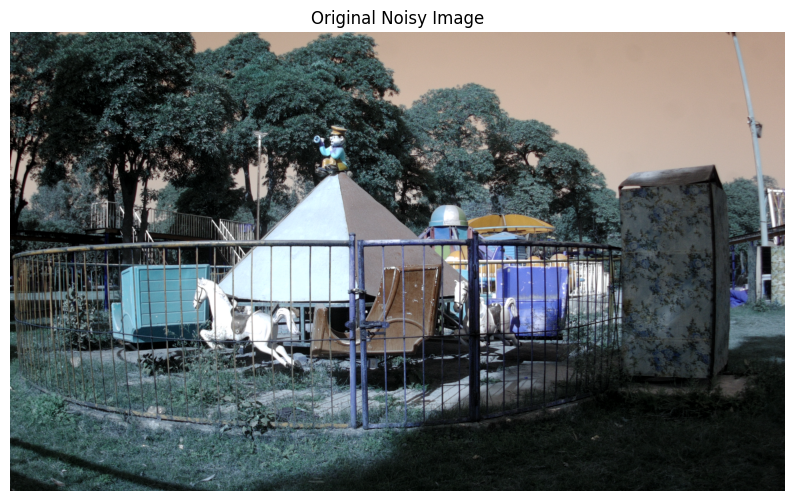

In [18]:
# Display the original noisy image
show_image('Original Noisy Image', image)

In [47]:
### 1. Noise Reduction using Addition and Averaging ###
# Create a slightly blurred version of the image
blurred_image = cv2.GaussianBlur(image, (5, 5),0)

In [48]:
# Add the original image and the blurred image
added_image = cv2.addWeighted(image, 0.5, blurred_image, 0.5, 0)

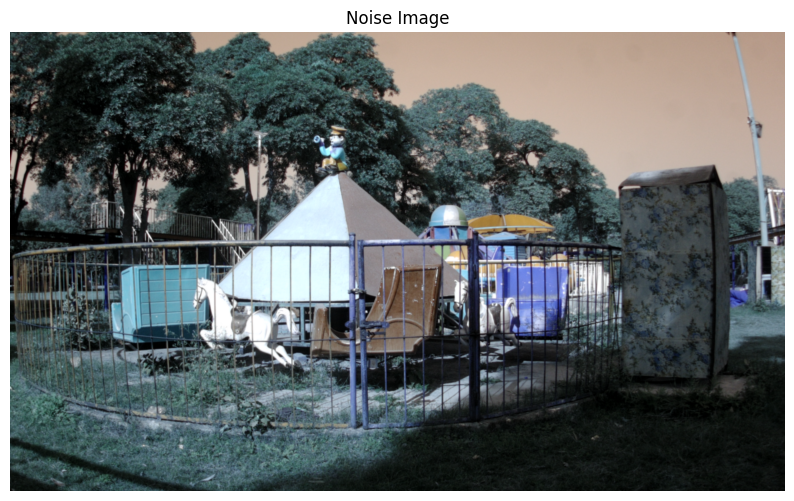

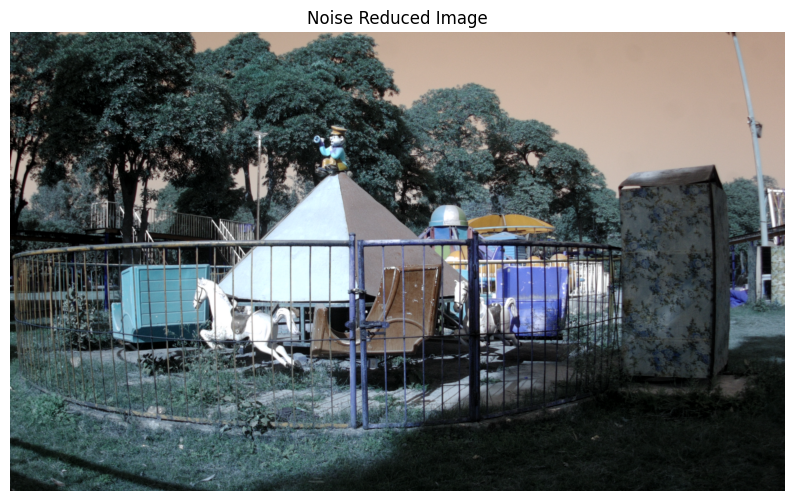

In [49]:
# Display the noise-reduced image
show_image('Noise Image',blurred_image)
show_image('Noise Reduced Image', added_image)

In [22]:
### 2. Change Detection using Subtraction ###
# Create a modified version of the image by adding noise
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
modified_image = cv2.add(image, noise)

In [23]:
# Detect changes by subtracting the original image from the modified image
change_detected = cv2.absdiff(image, modified_image)

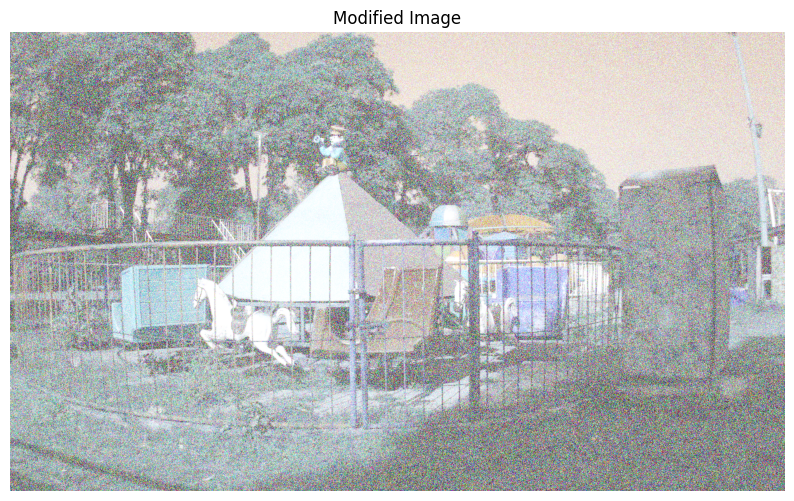

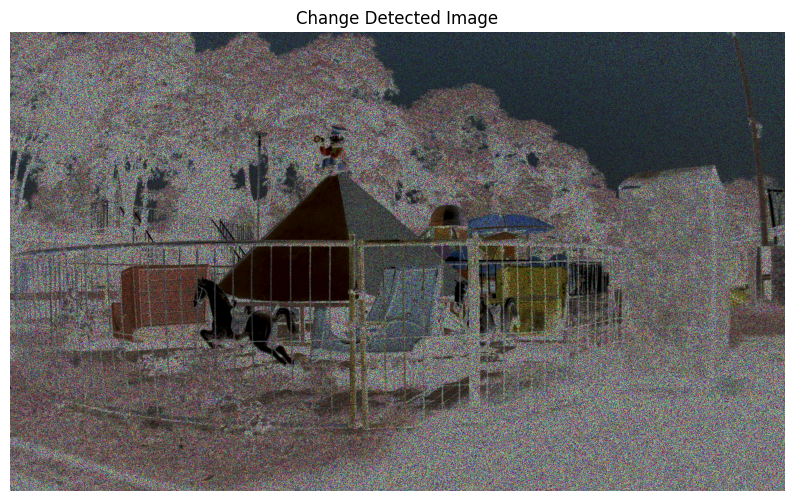

In [24]:
# Display the modified image and the change-detected image
show_image('Modified Image', modified_image)
show_image('Change Detected Image', change_detected)

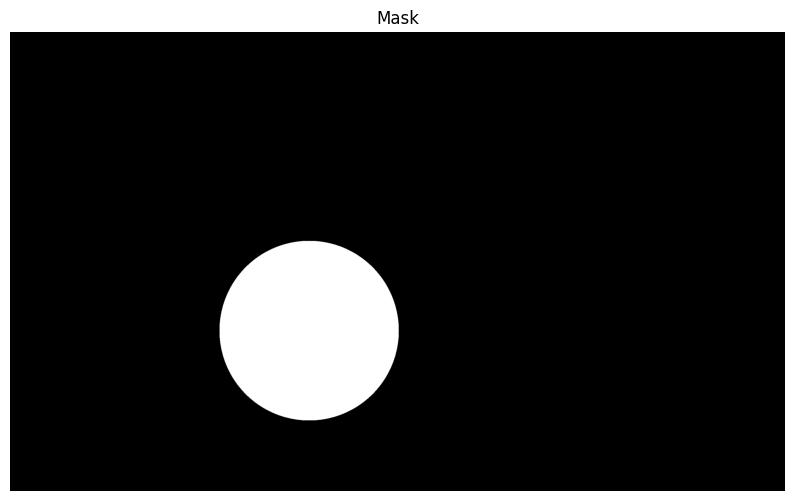

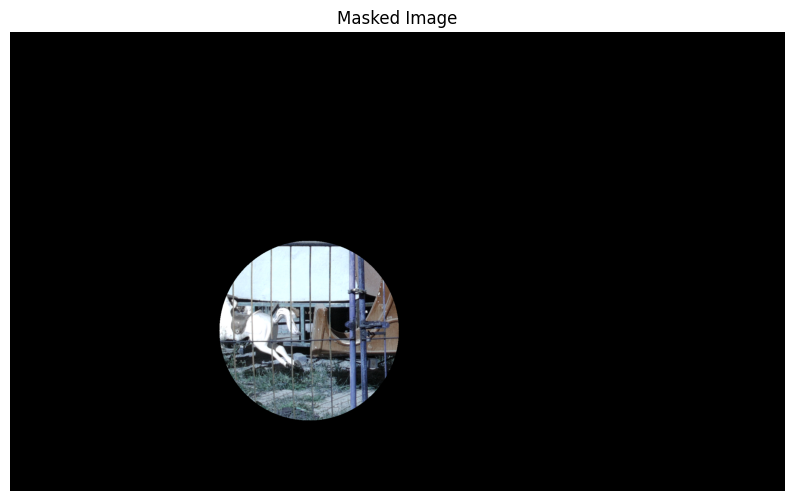

In [55]:
# Create a blank mask with the same size as the image
mask = np.zeros_like(image[:,:,0])

# Specify the center and radius of the circle
center = (1000, 1000)
radius = 300

# Draw the circle on the mask (255 indicates white)
cv2.circle(mask, center, radius, (255), -1)

# Display the mask
show_image('Mask', mask)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the masked image
show_image('Masked Image', masked_image)